# Visualise the data (dynamics, moments, WCF)

In this file we will plot the system dynamics, work moments, and the WCF. There will be no convergence tests in this file, which will be saved for "convergence_tests.ipynb"

In [23]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def load_dynamics(a, tp, sta, dt, p):
    filename  = f'data/dynamics-files/dyns-a{a}_G10.0_w25.0_e25.0_tp{tp}_sta{sta}_dt{dt}_p{p}.csv'
    try:
        df = pd.read_csv(filename)
        return df
    except:
        return None
    
def plot_dynamics(df):
    fig, axs = plt.subplots(2,3, figsize=(14, 6))

    # first row
    axs[0, 0].plot(df['tlist'], df['tr'], label='trace')
    axs[0,1].plot(df['tlist'], df['mag'], label='magnetization')
    axs[0,2].plot(df['tlist'], df['coh'], label='coherence')
    # second row
    axs[1, 0].plot(df['tlist'], df['energy'], label='energy')
    axs[1, 1].plot(df['tlist'], df['overlap_target'], label='overlap (target)')
    axs[1, 2].plot(df['tlist'], df['overlap_instant'], label='overlap (instant)')
    # formatting
    for ax in axs.flat:
        ax.set_xlabel('Time')
        ax.legend()
        ax.grid(alpha=0.2)
    return


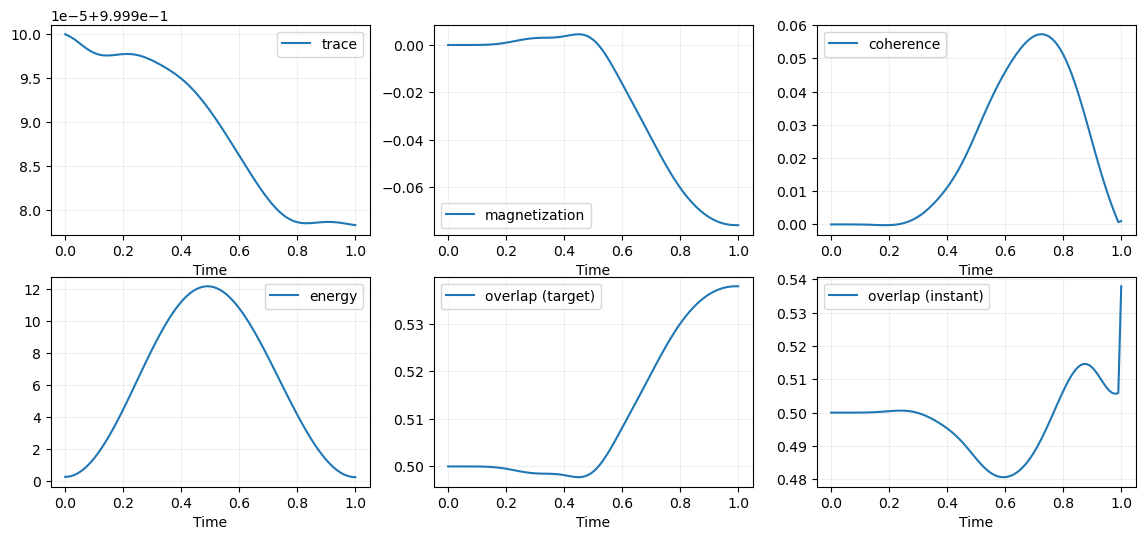

In [30]:
# test load:
alpha = 0.02
tp = 1.0
sta = 1
dt = 0.01
p = 7.0
S=1
dyns = load_dynamics(alpha, tp, sta, dt, p)
plot_dynamics(dyns)

In [31]:
# TODO plot moments - do we want to have moments calculated for all times during the protocol? If so, moments.py needs to be modified.

In [32]:
#

# Plot the work characteristic function

Text(0, 0.5, 'WCF')

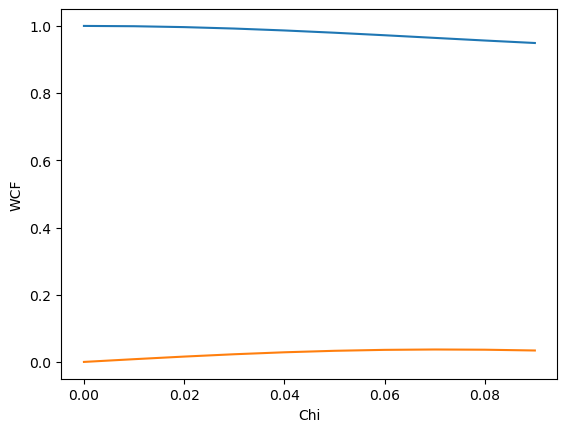

In [35]:
# WCF_a0.02_G10.0_w25.0_e25.0_t1.0_sta1_dt0.01_p7.0_eq1_X0.0_Xf0.1

wcf = pd.read_csv(f'data/wcf-files-combined/WCF_a{alpha}_G10.0_w25.0_e25.0_t{tp}_sta{sta}_dt{dt}_p{p}_eq{S}_X0.0_Xf0.1.txt', sep='\t', header=None)

chi_list = np.arange(0, len(wcf[0]))*dt

plt.plot(chi_list, wcf[0], label='Real')
plt.plot(chi_list, wcf[1], label='Imaginary')
plt.xlabel('Chi')
plt.ylabel('WCF')
